In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
plt.style.use('seaborn')
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data.csv',header=0)

In [3]:

df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
list(df.columns)

['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Severity_Mild',
 'Severity_Moderate',
 'Severity_None',
 'Severity_Severe',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes',
 'Country']

In [6]:
severity=[]
gender=[]
age=[]
for index, row in df.iterrows():
    if row['Severity_Severe'] == 1:
        severity.append(3)
    if row['Severity_Moderate'] == 1:
        severity.append(2)
    if row['Severity_Mild'] == 1:
        severity.append(1)
    if row['Severity_None'] == 1:
        severity.append(0) 
    if row['Age_0-9'] == 1:
        age.append(0)
    if row['Age_10-19'] == 1:
        age.append(1) 
    if row['Age_20-24'] == 1:
        age.append(2) 
    if row['Age_25-59'] == 1:
        age.append(3) 
    if row['Age_60+'] == 1:
        age.append(4) 
    if row['Gender_Female'] == 1:
        gender.append(0) 
    if row['Gender_Male'] == 1:
        gender.append(1) 
    if row['Gender_Transgender'] == 1:
        gender.append(2) 
         
     


In [7]:
df['severity']=severity
df['Age']=age
df['Gender']=gender


In [8]:
X = df[['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age',
  'Gender'      
 ]]
y = df[[ 'Severity_Severe'
 ]]
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [9]:
corrMatrix = train_data.corr(method = 'pearson')
corrMatrix

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age,Gender,Severity_Severe
Fever,1.000000,0.404211,0.050819,-0.136264,-0.164226,-0.173695,-0.001380,-0.002492,0.000142,0.000682,0.001852,0.000286,0.001532,0.000643
Tiredness,0.404211,1.000000,0.376951,-0.001578,-0.137106,-0.258167,0.001975,0.001725,0.000212,0.000390,-0.000252,0.000348,-0.001689,0.000869
Dry-Cough,0.050819,0.376951,1.000000,0.377952,0.050218,-0.292627,0.000747,0.001700,0.000003,-0.000147,-0.000485,-0.001643,0.000099,0.000495
Difficulty-in-Breathing,-0.136264,-0.001578,0.377952,1.000000,0.404196,-0.258184,0.002115,0.000370,-0.000255,-0.001270,-0.000492,-0.000501,-0.002197,-0.000042
Sore-Throat,-0.164226,-0.137106,0.050218,0.404196,1.000000,-0.174064,0.001263,0.000260,-0.000095,0.000655,-0.000260,0.000048,-0.000877,-0.001166
None_Sympton,-0.173695,-0.258167,-0.292627,-0.258184,-0.174064,1.000000,-0.002347,-0.000930,0.002945,0.001418,-0.000373,0.001097,0.001982,0.000659
Pains,-0.001380,0.001975,0.000747,0.002115,0.001263,-0.002347,1.000000,0.309764,-0.068786,-0.178017,-0.239006,-0.000223,-0.001665,0.000420
Nasal-Congestion,-0.002492,0.001725,0.001700,0.000370,0.000260,-0.000930,0.309764,1.000000,0.266711,-0.069278,-0.346700,0.001249,-0.001028,0.001457
Runny-Nose,0.000142,0.000212,0.000003,-0.000255,-0.000095,0.002945,-0.068786,0.266711,1.000000,0.309547,-0.346319,0.000741,-0.001847,0.001024
Diarrhea,0.000682,0.000390,-0.000147,-0.001270,0.000655,0.001418,-0.178017,-0.069278,0.309547,1.000000,-0.238701,-0.001200,0.001941,0.001671


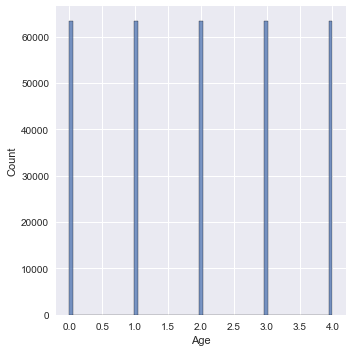

In [10]:
sns.displot(df, x="Age")

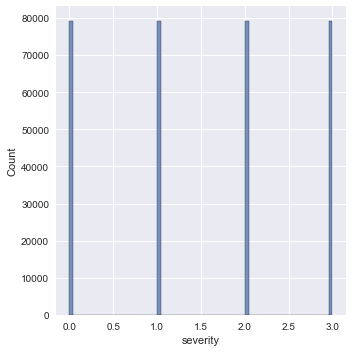

In [11]:
sns.displot(df, x="severity")

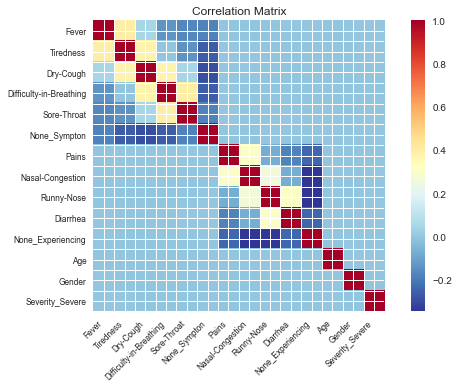

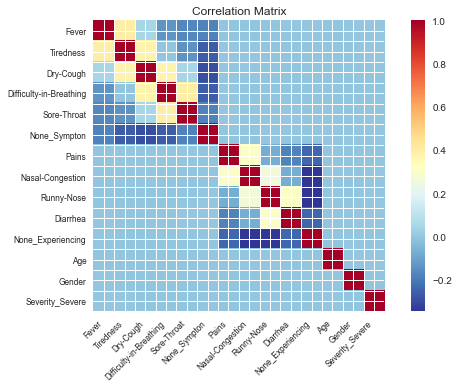

In [12]:
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

In [13]:
modelmlp=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(150,100,50),max_iter=1000)

In [14]:
modelmlp.fit(X_train,y_train)

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(150, 100, 50), max_iter=1000)

In [15]:
modelmlp.score(X_test,y_test)

0.7507049663299663

In [16]:
modelmlp.predict_proba(X_test)

array([[0.73683848, 0.26316152],
       [0.73630233, 0.26369767],
       [0.73790935, 0.26209065],
       ...,
       [0.73871277, 0.26128723],
       [0.73714968, 0.26285032],
       [0.73505242, 0.26494758]])

In [17]:
import keras.utils 
from keras.models import Sequential
from keras.layers import Dense

In [18]:
keras_model = Sequential()
keras_model.add(Dense(30,input_dim=13,activation='softmax'))
keras_model.add(Dense(30,activation='softmax'))


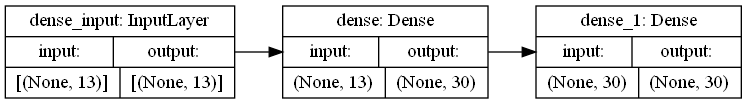

In [19]:
keras_model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])
keras.utils.plot_model(keras_model, show_shapes=True, rankdir="LR")

In [20]:
keras_model.fit(X_train,y_train,epochs=500)

Epoch 1/500
6930/6930 [==============================] - 5s 645us/step - loss: 0.2359 - accuracy: 0.0160
Epoch 2/500
6930/6930 [==============================] - 5s 658us/step - loss: 0.2341 - accuracy: 0.0170
Epoch 3/500
6930/6930 [==============================] - 5s 671us/step - loss: 0.2356 - accuracy: 0.0172
Epoch 4/500
6930/6930 [==============================] - 5s 660us/step - loss: 0.2349 - accuracy: 0.0173
Epoch 5/500
6930/6930 [==============================] - 5s 674us/step - loss: 0.2354 - accuracy: 0.0179
Epoch 6/500
6930/6930 [==============================] - 5s 673us/step - loss: 0.2343 - accuracy: 0.0186
Epoch 7/500
6930/6930 [==============================] - 5s 689us/step - loss: 0.2341 - accuracy: 0.0196
Epoch 8/500
6930/6930 [==============================] - 5s 676us/step - loss: 0.2349 - accuracy: 0.0201
Epoch 9/500
6930/6930 [==============================] - 5s 690us/step - loss: 0.2334 - accuracy: 0.0198
Epoch 10/500
6930/6930 [==============================]

KeyboardInterrupt: 